<a href="https://colab.research.google.com/github/taycurran/DS-Unit-2-Linear-Models/blob/master/CURRAN_M1_regression_classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [0]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

### MY CODE STARTS HERE

In [0]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Import Appropriate Estimator Class from Scikit-Learn
from sklearn.linear_model import LinearRegression

In [0]:
# Rename Dataframe
apartmentDf = df

In [37]:
# Overview
print(apartmentDf.shape)
apartmentDf.head()

(48818, 34)


,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## **General Assignment**
## Number of Bathrooms Relationship with Price

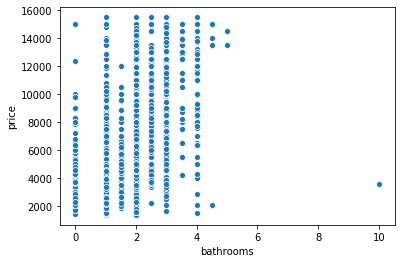

In [39]:
# Plot Bathroom Relationship with Price
sns.scatterplot(x="bathrooms", y="price", data=apartmentDf);

In [0]:
# Instantiate the Class
mBathrooms = LinearRegression()

In [0]:
# Arrange X Features Matrix and y Target Vector
featuresBathrooms = ['bathrooms']
target = 'price'
X_trainBathrooms = apartmentDf[featuresBathrooms]
y_train = apartmentDf[target]

In [56]:
# Fit the Model
mBathrooms.fit(X_trainBathrooms, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
# Apply the Model to New Data
hypotheticalBathrooms = 1.5
X_testBathrooms = [[hypotheticalBathrooms]]
y_predBathrooms = mBathrooms.predict(X_testBathrooms)
y_predBathrooms

array([4346.96612814])

In [0]:
# Generate Model Coeficients and Intercept
coefBathrooms = mBathrooms.coef_[0]
interceptBathrooms = mBathrooms.intercept_

In [59]:
# Equation with Unit Labels
print('y = mx + b')
print(f'y = ${coefBathrooms:,.0f}*x + {interceptBathrooms:,.0f}')
print(f'rent = {coefBathrooms:,.0f}*nBathrooms + {interceptBathrooms:,.0f}')

y = mx + b
y = $2,573*x + 487
rent = 2,573*nBathrooms + 487


In [0]:
# For each bathroom in an apartment, multipy by $2,573... 
# ...then add $487 to that product to arrive at the price per mont rent.

## **Stretch Goal**
## Multiple Features

In [0]:
# Instantiate the Class
modelNumeric = LinearRegression()

In [67]:
# Select Only Numeric Datatype from Dataframe
# Drop Latitude and Longitude (They Lack Ordinality)
# Drop the Target Variable
numericCols = apartmentDf.select_dtypes(include=[int, float]).columns
numericCols = numericCols.drop(['latitude', 'longitude', 'price'])
numericCols

Index(['bathrooms', 'bedrooms', 'elevator', 'cats_allowed', 'hardwood_floors',
       'dogs_allowed', 'doorman', 'dishwasher', 'no_fee',
       'laundry_in_building', 'fitness_center', 'pre-war', 'laundry_in_unit',
       'roof_deck', 'outdoor_space', 'dining_room', 'high_speed_internet',
       'balcony', 'swimming_pool', 'new_construction', 'terrace', 'exclusive',
       'loft', 'garden_patio', 'wheelchair_access', 'common_outdoor_space'],
      dtype='object')

In [62]:
# Arrange Data into Features Matrix and Target Vector
X_trainNumeric = apartmentDf[numericCols]
y_train.head()

0    3000
1    5465
2    2850
3    3275
4    3350
Name: price, dtype: int64

In [63]:
# Fit the Model to Data
modelNumeric.fit(X_trainNumeric, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
# Generate Coefficients
# nCoef == nFeatures
modelNumeric.coef_.size == X_trainNumeric.shape[1]

print(modelNumeric.coef_)
print(modelNumeric.intercept_)

[1785.33113003  461.97945059  149.35667543  -88.29558517 -216.66036505
  178.24314956  620.5548713   115.2394649  -190.65627387 -281.13015044
  236.61773839  -45.10459565  519.58554667 -151.53017026 -134.45862301
  169.04015944 -316.70549898  -41.72565935   40.59297069 -145.10772932
  187.23282      48.40733423  236.6762791    52.19942555  146.94074579
   78.42887172]
366.1284402157048


In [85]:
# Equation
nl = '\n'
numericCoeff = modelNumeric.coef_
numericEquation = (f"Predicted Rent = \n\n")

for (feature, coeff) in zip(numericCols, numericCoeff):
  numericEquation += (f"{coeff:,.0f}*{feature}{nl}")

print(numericEquation)

Predicted Rent = 

1,785*bathrooms
462*bedrooms
149*elevator
-88*cats_allowed
-217*hardwood_floors
178*dogs_allowed
621*doorman
115*dishwasher
-191*no_fee
-281*laundry_in_building
237*fitness_center
-45*pre-war
520*laundry_in_unit
-152*roof_deck
-134*outdoor_space
169*dining_room
-317*high_speed_internet
-42*balcony
41*swimming_pool
-145*new_construction
187*terrace
48*exclusive
237*loft
52*garden_patio
147*wheelchair_access
78*common_outdoor_space



## **Stuff I'm Trying to Make Work for Later**

## Interest Level Relationship with Price

In [7]:
apartmentDf['interest_level'].value_counts()

low       33947
medium    11181
high       3690
Name: interest_level, dtype: int64

In [8]:
intLevDict = {'Int_Level': apartmentDf['interest_level'], 'Price': apartmentDf['price']}
intLevDf = pd.DataFrame(data=intLevDict)
intLevDf.head()

,Int_Level,Price
0,medium,3000
1,low,5465
2,high,2850
3,low,3275
4,low,3350


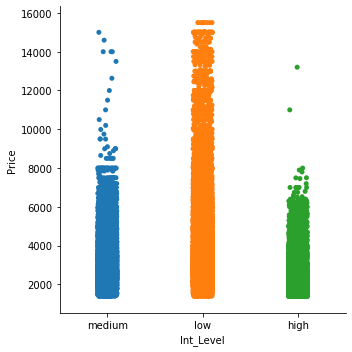

In [9]:
sns.catplot(x="Int_Level", y="Price", data=intLevDf);

In [0]:
plt.plot_date('created', 'price', xdate=True, ydate=False,
              data=apartmentDf)
plt.show()

## Created Date with Price

In [0]:
#intLevDict = {'Int_Level': apartmentDf['interest_level'], 'Price': apartmentDf['price']}
#intLevDf = pd.DataFrame(data=intLevDict)
#intLevDf.head()

In [0]:
#df[['Date','Value']].set_index('Date').plot()

apartmentDf[['created', 'price']].set_index('created')